# PCAP

In [1]:
# @title
import datetime
print(datetime.datetime.now())

2024-04-24 00:35:30.835224


References:

 https://medium.com/hackervalleystudio/learning-packet-analysis-with-data-science-5356a3340d4e

https://scapy.readthedocs.io/en/latest/usage.html#reading-pcap-files

In [2]:
!date

Wed Apr 24 12:35:30 AM UTC 2024


### Download files

In [3]:
import requests

def downloadgithub(url):
  response = requests.get(url)
  if response.status_code == 200:
    filename = url.split('/')[-1]
    with open(filename, 'wb') as f:
      f.write(response.content)
  else:
    print('Error: Failed to download the file')
  return url

In [5]:
url = 'https://github.com/hsiaom26/DS4CS-24/raw/main/data/suspicious.pcap'
downloadgithub(url)

'https://github.com/hsiaom26/DS4CS-24/raw/main/data/suspicious.pcap'

In [6]:
!ls -al

total 52
drwxr-xr-x 1 root root  4096 Apr 24 00:35 .
drwxr-xr-x 1 root root  4096 Apr 24 00:30 ..
drwxr-xr-x 4 root root  4096 Apr 22 13:25 .config
drwxr-xr-x 1 root root  4096 Apr 22 13:25 sample_data
-rw-r--r-- 1 root root 33463 Apr 24 00:36 suspicious.pcap


In [7]:
!curl ipecho.net/plain

35.204.199.133

### Install packages

In [8]:
!pip install scapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444327 sha256=8486b5b096c5ff79e9e75e256f423aa6156c415b5130beec018ae487403c018f
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy


In [9]:
from scapy.all import * # Packet manipulation
# https://scapy.readthedocs.io/en/latest/usage.html # must see

import pandas as pd
import numpy as np
import binascii # Binary to Ascii
import seaborn as sns
import matplotlib.pyplot as plt

### sniff 100 packets


In [10]:
num_of_packets_to_sniff = 100
pcap = sniff(count=num_of_packets_to_sniff)

In [11]:
print(type(pcap))
print(len(pcap))
print(pcap)

<class 'scapy.plist.PacketList'>
100
<Sniffed: TCP:100 UDP:0 ICMP:0 Other:0>


In [12]:
print(type(pcap[0]))

<class 'scapy.layers.l2.Ether'>


In [13]:
# save pacp file to disk
wrpcap("tmp.pcap", pcap)

### sniff example


In [14]:
sniff(prn=lambda x: x.show(), count=2)

###[ Ethernet ]### 
  dst       = 02:42:ac:1c:00:0c
  src       = 02:42:8c:f3:18:c3
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 930
     id        = 34454
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = 6
     chksum    = 0x587a
     src       = 172.28.0.1
     dst       = 172.28.0.12
     \options   \
###[ TCP ]### 
        sport     = 51330
        dport     = 8080
        seq       = 3718283648
        ack       = 2351123916
        dataofs   = 8
        reserved  = 0
        flags     = PA
        window    = 501
        chksum    = 0x5bda
        urgptr    = 0
        options   = [('NOP', None), ('NOP', None), ('Timestamp', (2459773250, 2071755256))]
###[ Raw ]### 
           load      = 'GET /socket.io/?EIO=3&sid=4LZrFLOZ96hYADnFAAAA&t=OyDZ1SB&transport=polling HTTP/1.1\r\nHost: colab.research.google.com\r\nUser-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KH

<Sniffed: TCP:2 UDP:0 ICMP:0 Other:0>

In [15]:
sniff(prn=lambda x: x.summary(), count = 2)

Ether / IP / TCP 172.28.0.1:60824 > 172.28.0.12:8080 PA / Raw
Ether / IP / TCP 172.28.0.12:8080 > 172.28.0.1:60824 A


<Sniffed: TCP:2 UDP:0 ICMP:0 Other:0>

In [16]:
pkts = sniff(prn=lambda x:x.sprintf("{IP:%IP.src% -> %IP.dst%\n}{Raw:%Raw.load%\n}"), count=4)

172.28.0.1 -> 172.28.0.12
'GET /socket.io/?EIO=3&sid=4LZrFLOZ96hYADnFAAAA&t=OyDZ8j0&transport=polling HTTP/1.1\r\nHost: colab.research.google.com\r\nUser-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36,gzip(gfe)\r\nAccept: */*\r\nAccept-Encoding: gzip, deflate, br, zstd,gzip(gfe)\r\nAccept-Language: zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7\r\nReferer: https://colab.research.google.com/\r\nSec-Ch-Ua: "Google Chrome";v="123", "Not:A-Brand";v="8", "Chromium";v="123"\r\nSec-Ch-Ua-Arch: "arm"\r\nSec-Ch-Ua-Bitness: "64"\r\nSec-Ch-Ua-Full-Version-List: "Google Chrome";v="123.0.6312.124", "Not:A-Brand";v="8.0.0.0", "Chromium";v="123.0.6312.124"\r\nSec-Ch-Ua-Mobile: ?0\r\nSec-Ch-Ua-Model: ""\r\nSec-Ch-Ua-Platform: "macOS"\r\nSec-Ch-Ua-Platform-Version: "14.4.1"\r\nSec-Ch-Ua-Wow64: ?0\r\nSec-Fetch-Dest: empty\r\nSec-Fetch-Mode: cors\r\nSec-Fetch-Site: same-origin\r\n\r\n'

172.28.0.12 -> 172.28.0.1

172.28.0.12 -> 172.28.0.1

In [17]:
# high-level functions are already coded
lsc()

IPID_count            : Identify IP id values classes in a list of packets
arp_mitm              : ARP MitM: poison 2 target's ARP cache
arpcachepoison        : Poison targets' ARP cache
arping                : Send ARP who-has requests to determine which hosts are up
arpleak               : Exploit ARP leak flaws, like NetBSD-SA2017-002.
bind_layers           : Bind 2 layers on some specific fields' values.
bridge_and_sniff      : Forward traffic between interfaces if1 and if2, sniff and return
chexdump              : Build a per byte hexadecimal representation
computeNIGroupAddr    : Compute the NI group Address. Can take a FQDN as input parameter
corrupt_bits          : Flip a given percentage (at least one bit) or number of bits
corrupt_bytes         : Corrupt a given percentage (at least one byte) or number of bytes
defrag                : defrag(plist) -> ([not fragmented], [defragmented],
defragment            : defragment(plist) -> plist defragmented as much as possible 
dhcp_r

In [18]:
!apt install p0f

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpcap0.8
The following NEW packages will be installed:
  libpcap0.8 p0f
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 224 kB of archives.
After this operation, 589 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libpcap0.8 amd64 1.10.1-4build1 [145 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 p0f amd64 3.09b-3 [79.0 kB]
Fetched 224 kB in 1s (371 kB/s)
Selecting previously unselected package libpcap0.8:amd64.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../libpcap0.8_1.10.1-4build1_amd64.deb ...
Unpacking libpcap0.8:amd64 (1.10.1-4build1) ...
Selecting previously unselected package p0f.
Preparing to unpack .../archives/p0f_3.09b-3_amd64.deb ...
Unpacking p0f (3.09b-3) ...
Setting up libpcap

In [19]:
!p0f -r tmp.pcap

--- p0f 3.09b by Michal Zalewski <lcamtuf@coredump.cx> ---

[+] Closed 1 file descriptor.
[+] Loaded 322 signatures from '/etc/p0f/p0f.fp'.
[+] Will read pcap data from file 'tmp.pcap'.
[+] Default packet filtering configured [+VLAN].
[+] Processing capture data.

.-[ 172.28.0.1/37914 -> 172.28.0.12/8080 (syn) ]-
|
| client   = 172.28.0.1/37914
| os       = Linux 2.2.x-3.x
| dist     = 0
| params   = generic
| raw_sig  = 4:64+0:0:1460:mss*44,7:mss,sok,ts,nop,ws:df,id+:0
|
`----

.-[ 172.28.0.1/37914 -> 172.28.0.12/8080 (mtu) ]-
|
| client   = 172.28.0.1/37914
| link     = Ethernet or modem
| raw_mtu  = 1500
|
`----

.-[ 172.28.0.1/37914 -> 172.28.0.12/8080 (syn+ack) ]-
|
| server   = 172.28.0.12/8080
| os       = ???
| dist     = 0
| params   = none
| raw_sig  = 4:64+0:0:1460:mss*45,7:mss,sok,ts,nop,ws:df:0
|
`----

.-[ 172.28.0.1/37914 -> 172.28.0.12/8080 (mtu) ]-
|
| server   = 172.28.0.12/8080
| link     = Ethernet or modem
| raw_mtu  = 1500
|
`----

.-[ 172.28.0.1/53842 -> 172.28.0

### Append suspicious pcap to current stream


In [20]:
pcap = pcap + rdpcap("suspicious.pcap")

In [21]:
print(len(pcap))
pcap

162


<Sniffed+suspicious.pcap: TCP:100 UDP:62 ICMP:0 Other:0>

### TCP Segment
Frames/Packets/Segments each encapsulated layer consists of fields

In [ ]:
"""
0                   1                   2                   3
0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|          Source Port          |       Destination Port        |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                        Sequence Number                        |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                    Acknowledgment Number                      |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|  Data |           |U|A|P|R|S|F|                               |
| Offset| Reserved  |R|C|S|S|Y|I|            Window             |
|       |           |G|K|H|T|N|N|                               |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|           Checksum            |         Urgent Pointer        |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                    Options                    |    Padding    |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
|                             data                              |
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
02 04 05 a0 01 03 03 05 01 01 08 0a 1d 74 65 c5 00 00 00 00 04 02 00 00
"""

# Frames/Packets/Segments all consists of fields
# TODO: Identify how to handle arrays in dataframe

print()

### Exploring an item in packet list

In [22]:
# ETHERNET -> Internet Protocol -> Layer 4 Segments
# We're only interested in Layers 3 (IP) and 4 (TCP AND UDP)
## We'll parse those two layers and the layer 4 payload
## When capturing we capture layer 2 frames and beyond

# Retrieving a single item from packet list
ethernet_frame = pcap[101]
ip_packet = ethernet_frame.payload
segment = ip_packet.payload
data = segment.payload # Retrieve payload that comes after layer 4

# Observe that we just popped off previous layer header
print(ethernet_frame.summary())
print(ip_packet.summary())
print(segment.summary())
print(data.summary()) # If blank, empty object

# Complete depiction of paket
## Achieving understanding that these are the fields will enable the ability
## to ask the data more meaningful questions ie) type of layer 4 segment is defined in layer 3 packet
ethernet_frame.show()

Ether / IP / UDP / DNS Ans "2607:f8b0:4005:807::200e" 
IP / UDP / DNS Ans "2607:f8b0:4005:807::200e" 
UDP / DNS Ans "2607:f8b0:4005:807::200e" 
DNS Ans "2607:f8b0:4005:807::200e" 
###[ Ethernet ]### 
  dst       = 88:e9:fe:6a:92:52
  src       = 80:37:73:96:9b:db
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x20
     len       = 84
     id        = 58919
     flags     = 
     frag      = 0
     ttl       = 122
     proto     = 17
     chksum    = 0x360c
     src       = 84.54.22.33
     dst       = 10.1.10.53
     \options   \
###[ UDP ]### 
        sport     = 53
        dport     = 53
        len       = 64
        chksum    = 0xfe25
###[ DNS ]### 
           id        = 12
           qr        = 1
           opcode    = QUERY
           aa        = 0
           tc        = 0
           rd        = 1
           ra        = 1
           z         = 0
           ad        = 0
           cd        = 0
           rcode     = ok
           qdcou

In [23]:
hexdump(pcap[101])

0000  88 E9 FE 6A 92 52 80 37 73 96 9B DB 08 00 45 20  ...j.R.7s.....E 
0010  00 54 E6 27 00 00 7A 11 36 0C 54 36 16 21 0A 01  .T.'..z.6.T6.!..
0020  0A 35 00 35 00 35 00 40 FE 25 00 0C 81 80 00 01  .5.5.5.@.%......
0030  00 01 00 00 00 00 06 67 6F 6F 67 6C 65 03 63 6F  .......google.co
0040  6D 00 00 1C 00 01 C0 0C 00 1C 00 01 00 00 01 2B  m..............+
0050  00 10 26 07 F8 B0 40 05 08 07 00 00 00 00 00 00  ..&...@.........
0060  20 0E                                             .


In [24]:
ls(pcap[101])

dst        : DestMACField                        = '88:e9:fe:6a:92:52' ('None')
src        : SourceMACField                      = '80:37:73:96:9b:db' ('None')
type       : XShortEnumField                     = 2048            ('36864')
--
version    : BitField  (4 bits)                  = 4               ('4')
ihl        : BitField  (4 bits)                  = 5               ('None')
tos        : XByteField                          = 32              ('0')
len        : ShortField                          = 84              ('None')
id         : ShortField                          = 58919           ('1')
flags      : FlagsField                          = <Flag 0 ()>     ('<Flag 0 ()>')
frag       : BitField  (13 bits)                 = 0               ('0')
ttl        : ByteField                           = 122             ('64')
proto      : ByteEnumField                       = 17              ('0')
chksum     : XShortField                         = 13836           ('None')
src       

In [25]:
pcap[101].summary()

'Ether / IP / UDP / DNS Ans "2607:f8b0:4005:807::200e" '

In [26]:
pcap[101].show()

###[ Ethernet ]### 
  dst       = 88:e9:fe:6a:92:52
  src       = 80:37:73:96:9b:db
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x20
     len       = 84
     id        = 58919
     flags     = 
     frag      = 0
     ttl       = 122
     proto     = 17
     chksum    = 0x360c
     src       = 84.54.22.33
     dst       = 10.1.10.53
     \options   \
###[ UDP ]### 
        sport     = 53
        dport     = 53
        len       = 64
        chksum    = 0xfe25
###[ DNS ]### 
           id        = 12
           qr        = 1
           opcode    = QUERY
           aa        = 0
           tc        = 0
           rd        = 1
           ra        = 1
           z         = 0
           ad        = 0
           cd        = 0
           rcode     = ok
           qdcount   = 1
           ancount   = 1
           nscount   = 0
           arcount   = 0
           \qd        \
            |###[ DNS Question Record ]### 
            |  qname     = '

See this to show visualized graph of a packet.

https://scapy.readthedocs.io/en/latest/usage.html#graphical-dumps-pdf-ps


### Understanding object types in scapy and Importing layers

In [27]:
# Understanding the object types in scapy
print(type(ethernet_frame))
print(type(ip_packet))
print(type(segment))

# Packets can be filtered on layers ie) ethernet_frame[scapy.layers.l2.Ether]
ethernet_type = type(ethernet_frame)
ip_type = type(ip_packet)
tcp_type = type(segment)
print("Ethernet", pcap[ethernet_type])
print("IP", pcap[ip_type])
print("TCP", pcap[tcp_type])

# Scapy provides this via import statements
from scapy.layers.l2 import Ether
from scapy.layers.inet import IP
from scapy.layers.inet import TCP, UDP

print("UDP", pcap[UDP])

<class 'scapy.layers.l2.Ether'>
<class 'scapy.layers.inet.IP'>
<class 'scapy.layers.inet.UDP'>
Ethernet <Ether from Sniffed+suspicious.pcap: TCP:100 UDP:62 ICMP:0 Other:0>
IP <IP from Sniffed+suspicious.pcap: TCP:100 UDP:62 ICMP:0 Other:0>
TCP <UDP from Sniffed+suspicious.pcap: TCP:0 UDP:62 ICMP:0 Other:0>
UDP <UDP from Sniffed+suspicious.pcap: TCP:0 UDP:62 ICMP:0 Other:0>


### Convert PCAP to DataFrame

In [28]:
# Collect field names from IP/TCP/UDP (These will be columns in DF)
ip_fields = [field.name for field in IP().fields_desc]
tcp_fields = [field.name for field in TCP().fields_desc]
udp_fields = [field.name for field in UDP().fields_desc]

dataframe_fields = ip_fields + ['time'] + tcp_fields + ['payload','payload_raw','payload_hex']

# Create blank DataFrame
df = pd.DataFrame(columns=dataframe_fields)
for packet in pcap[IP]:
    # Field array for each row of DataFrame
    field_values = []
    # Add all IP fields to dataframe
    for field in ip_fields:
        if field == 'options':
            # Retrieving number of options defined in IP Header
            field_values.append(len(packet[IP].fields[field]))
        else:
            field_values.append(packet[IP].fields[field])

    field_values.append(packet.time)

    layer_type = type(packet[IP].payload)
    for field in tcp_fields:
        try:
            if field == 'options':
                field_values.append(len(packet[layer_type].fields[field]))
            else:
                field_values.append(packet[layer_type].fields[field])
        except:
            field_values.append(None)

    # Append payload
    field_values.append(len(packet[layer_type].payload))
    field_values.append(packet[layer_type].payload.original)
    field_values.append(binascii.hexlify(packet[layer_type].payload.original))
    # Add row to DF
    df_append = pd.DataFrame([field_values], columns=dataframe_fields)
    df = pd.concat([df, df_append], axis=0)

# Reset Index
df = df.reset_index()
# Drop old index column
df = df.drop(columns="index")

### DataFrame


In [29]:
# Return first 5 rows
df.head()

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,930,10247,DF,0,64,6,46857,...,8,0,PA,501,23514,0,3,878,b'GET /socket.io/?EIO=3&sid=4LZrFLOZ96hYADnFAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
1,4,5,0,717,1799,DF,0,64,6,55518,...,8,0,PA,501,23301,0,3,665,b'HTTP/1.1 200 OK\r\nContent-Type: text/plain;...,b'485454502f312e3120323030204f4b0d0a436f6e7465...
2,4,5,0,52,10248,DF,0,64,6,47734,...,8,0,A,501,22636,0,3,0,b'',b''
3,4,5,0,1034,10249,DF,0,64,6,46751,...,8,0,PA,501,23618,0,3,982,b'POST /socket.io/?EIO=3&sid=4LZrFLOZ96hYADnFA...,b'504f5354202f736f636b65742e696f2f3f45494f3d33...
4,4,5,0,107,10250,DF,0,64,6,47677,...,8,0,PA,501,22691,0,3,55,"b'52:451-/debugger,[""data"",{""_placeholder"":tru...",b'35323a3435312d2f64656275676765722c5b22646174...


In [30]:
# Return last 5 rows
df.tail()

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
157,4,5,32,84,8744,,0,122,17,64011,...,None,None,None,None,65088,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...
158,4,5,0,969,1,,0,64,17,21214,...,None,None,None,None,671,None,None,941,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
159,4,5,32,84,9344,,0,122,17,63411,...,None,None,None,None,65089,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...
160,4,5,0,588,1,,0,64,17,21595,...,None,None,None,None,54406,None,None,560,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
161,4,5,32,84,10094,,0,122,17,62661,...,None,None,None,None,65090,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...


In [31]:
print(df.shape)

(162, 28)


### Statistics

In [32]:
# Top Source Adddress
print("# Top Source Address")
print(df['src'].describe(),'\n\n')

# Top Destination Address
print("# Top Destination Address")
print(df['dst'].describe(),"\n\n")

frequent_address = df['src'].describe()['top']

# Who is the top address speaking to
print("# Who is Top Address Speaking to?")
print(df[df['src'] == frequent_address]['dst'].unique(),"\n\n")

# Who is the top address speaking to (dst ports)
print("# Who is the top address speaking to (Destination Ports)")
print(df[df['src'] == frequent_address]['dport'].unique(),"\n\n")

# Who is the top address speaking to (src ports)
print("# Who is the top address speaking to (Source Ports)")
print(df[df['src'] == frequent_address]['sport'].unique(),"\n\n")

# Top Source Address
count            162
unique             5
top       172.28.0.1
freq              56
Name: src, dtype: object 


# Top Destination Address
count             162
unique              5
top       172.28.0.12
freq               56
Name: dst, dtype: object 


# Who is Top Address Speaking to?
['172.28.0.12'] 


# Who is the top address speaking to (Destination Ports)
[8080 6000] 


# Who is the top address speaking to (Source Ports)
[37900 35342 37914 51942 53842 36722 36738 35872] 




In [33]:
# Unique Source Addresses
print("Unique Source Addresses")
print(df['src'].unique())

print()

# Unique Destination Addresses
print("Unique Destination Addresses")
print(df['dst'].unique())

Unique Source Addresses
['172.28.0.1' '172.28.0.12' '10.1.10.53' '84.54.22.33' '75.75.75.75']

Unique Destination Addresses
['172.28.0.12' '172.28.0.1' '84.54.22.33' '10.1.10.53' '75.75.75.75']


### Graphing


<Axes: title={'center': 'Addresses Sending Payloads'}, ylabel='src'>

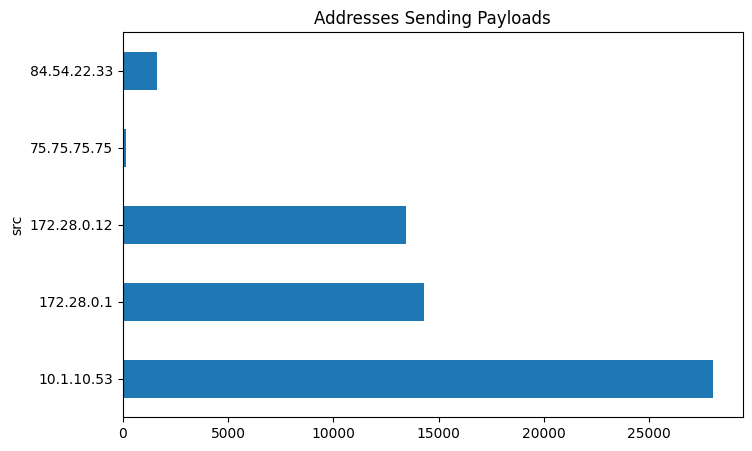

In [34]:
# Group by Source Address and Payload Sum
source_addresses = df.groupby("src")['payload'].sum()
source_addresses.plot(kind='barh',title="Addresses Sending Payloads",figsize=(8,5))

<Axes: title={'center': 'Destination Addresses (Bytes Received)'}, ylabel='dst'>

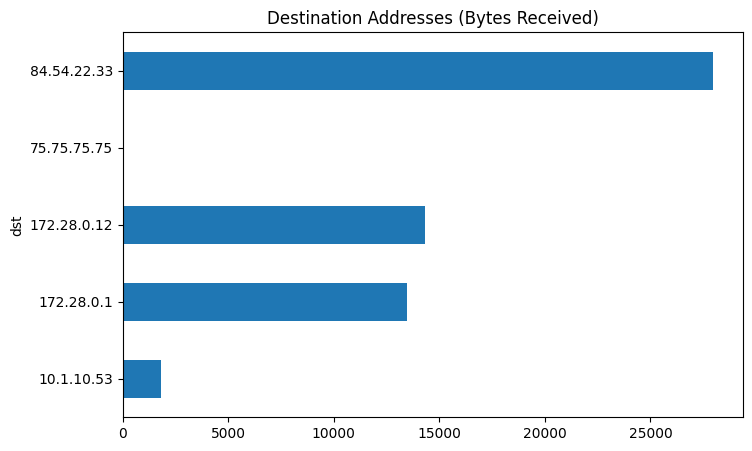

In [35]:
# Group by Destination Address and Payload Sum
destination_addresses = df.groupby("dst")['payload'].sum()
destination_addresses.plot(kind='barh', title="Destination Addresses (Bytes Received)",figsize=(8,5))

<Axes: title={'center': 'Source Ports (Bytes Sent)'}, ylabel='sport'>

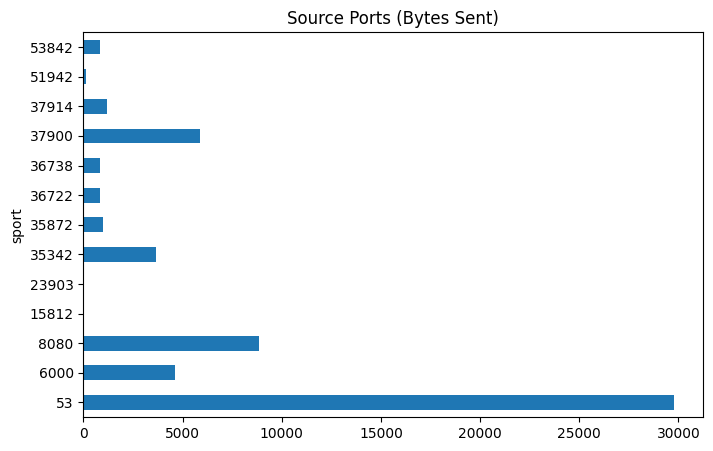

In [36]:
# Group by Source Port and Payload Sum
source_payloads = df.groupby("sport")['payload'].sum()
source_payloads.plot(kind='barh',title="Source Ports (Bytes Sent)",figsize=(8,5))

<Axes: title={'center': 'Destination Ports (Bytes Received)'}, ylabel='dport'>

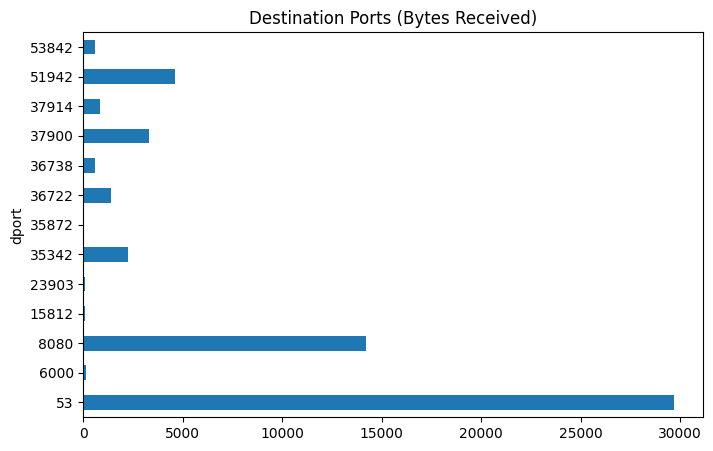

In [37]:
# Group by Destination Port and Payload Sum
destination_payloads = df.groupby("dport")['payload'].sum()
destination_payloads.plot(kind='barh',title="Destination Ports (Bytes Received)",figsize=(8,5))

Text(0.5, 1.0, 'History of bytes sent by most frequent address')

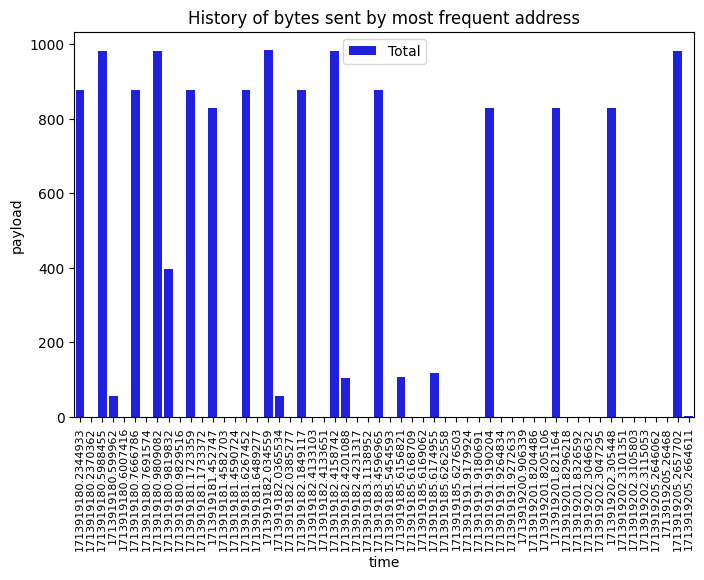

In [38]:
plt.figure(figsize=(8,5))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90, fontsize=8)

#groupby("time")['payload'].sum().plot(kind='barh',title="Destination Ports (Bytes Received)",figsize=(8,5))


frequent_address_df = df[df['src'] == frequent_address]
x = frequent_address_df['payload'].tolist()
sns.barplot(x="time", y="payload", data=frequent_address_df[['payload','time']],
            label="Total", color="b").set_title("History of bytes sent by most frequent address")


### Payload Investigation

172.28.0.12 May be a suspicious address


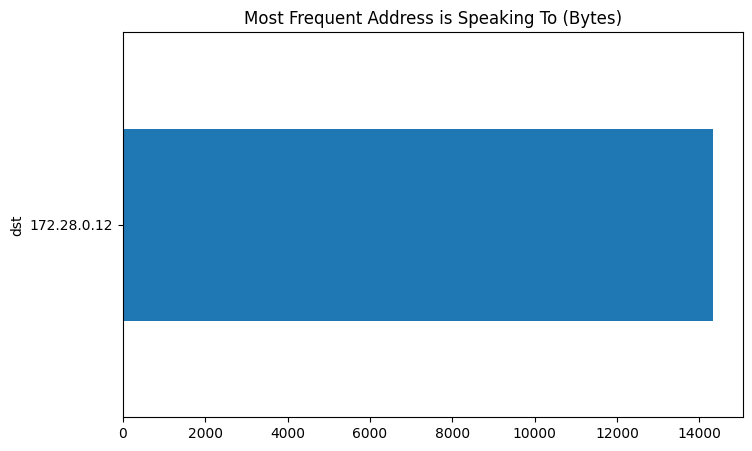

In [39]:
# Create dataframe with only converation from most frequent address
frequent_address_df = df[df['src']==frequent_address]

# Only display Src Address, Dst Address, and group by Payload
frequent_address_groupby = frequent_address_df[['src','dst','payload']].groupby("dst")['payload'].sum()

# Plot the Frequent address is speaking to (By Payload)
frequent_address_groupby.plot(kind='barh',title="Most Frequent Address is Speaking To (Bytes)",figsize=(8,5))

# Which address has excahnged the most amount of bytes with most frequent address
suspicious_ip = frequent_address_groupby.sort_values(ascending=False).index[0]
print(suspicious_ip, "May be a suspicious address")

# Create dataframe with only conversation from most frequent address and suspicious address
suspicious_df = frequent_address_df[frequent_address_df['dst']==suspicious_ip]

In [40]:
# Store each payload in an array
raw_stream = []
for p in suspicious_df['payload_raw']:
    raw_stream.append(p)

print(raw_stream)

[b'GET /socket.io/?EIO=3&sid=4LZrFLOZ96hYADnFAAAA&t=OyDYpp-&transport=polling HTTP/1.1\r\nHost: colab.research.google.com\r\nUser-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36,gzip(gfe)\r\nAccept: */*\r\nAccept-Encoding: gzip, deflate, br, zstd,gzip(gfe)\r\nAccept-Language: zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7\r\nReferer: https://colab.research.google.com/\r\nSec-Ch-Ua: "Google Chrome";v="123", "Not:A-Brand";v="8", "Chromium";v="123"\r\nSec-Ch-Ua-Arch: "arm"\r\nSec-Ch-Ua-Bitness: "64"\r\nSec-Ch-Ua-Full-Version-List: "Google Chrome";v="123.0.6312.124", "Not:A-Brand";v="8.0.0.0", "Chromium";v="123.0.6312.124"\r\nSec-Ch-Ua-Mobile: ?0\r\nSec-Ch-Ua-Model: ""\r\nSec-Ch-Ua-Platform: "macOS"\r\nSec-Ch-Ua-Platform-Version: "14.4.1"\r\nSec-Ch-Ua-Wow64: ?0\r\nSec-Fetch-Dest: empty\r\nSec-Fetch-Mode: cors\r\nSec-Fetch-Site: same-origin\r\n\r\n', b'', b'POST /socket.io/?EIO=3&sid=4LZrFLOZ96hYADnFAAAA&t=OyDYpvc&transport=p

### HTTP

In [41]:
http_df = df[df['dport'] == 8080]
http_df

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,930,10247,DF,0,64,6,46857,...,8,0,PA,501,23514,0,3,878,b'GET /socket.io/?EIO=3&sid=4LZrFLOZ96hYADnFAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
2,4,5,0,52,10248,DF,0,64,6,47734,...,8,0,A,501,22636,0,3,0,b'',b''
3,4,5,0,1034,10249,DF,0,64,6,46751,...,8,0,PA,501,23618,0,3,982,b'POST /socket.io/?EIO=3&sid=4LZrFLOZ96hYADnFA...,b'504f5354202f736f636b65742e696f2f3f45494f3d33...
4,4,5,0,107,10250,DF,0,64,6,47677,...,8,0,PA,501,22691,0,3,55,"b'52:451-/debugger,[""data"",{""_placeholder"":tru...",b'35323a3435312d2f64656275676765722c5b22646174...
7,4,5,0,52,10251,DF,0,64,6,47731,...,8,0,A,499,22636,0,3,0,b'',b''
8,4,5,0,930,10252,DF,0,64,6,46852,...,8,0,PA,501,23514,0,3,878,b'GET /socket.io/?EIO=3&sid=4LZrFLOZ96hYADnFAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
10,4,5,0,52,10253,DF,0,64,6,47729,...,8,0,A,501,22636,0,3,0,b'',b''
11,4,5,0,1035,10254,DF,0,64,6,46745,...,8,0,PA,501,23619,0,3,983,b'POST /socket.io/?EIO=3&sid=4LZrFLOZ96hYADnFA...,b'504f5354202f736f636b65742e696f2f3f45494f3d33...
12,4,5,0,449,10255,DF,0,64,6,47330,...,8,0,PA,501,23033,0,3,397,b'\x01\x07\x00\xff\x04Content-Length: 47\r\n\r...,b'010700ff04436f6e74656e742d4c656e6774683a2034...
15,4,5,0,52,10256,DF,0,64,6,47726,...,8,0,A,501,22636,0,3,0,b'',b''


In [42]:
http_req_df = http_df[http_df['payload_raw'].apply(lambda b: b is not b"")]
http_req_df

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-42-9b08af7a3635>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  http_req_df = http_df[http_df['payload_raw'].apply(lambda b: b is not b"")]


,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,930,10247,DF,0,64,6,46857,...,8,0,PA,501,23514,0,3,878,b'GET /socket.io/?EIO=3&sid=4LZrFLOZ96hYADnFAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
3,4,5,0,1034,10249,DF,0,64,6,46751,...,8,0,PA,501,23618,0,3,982,b'POST /socket.io/?EIO=3&sid=4LZrFLOZ96hYADnFA...,b'504f5354202f736f636b65742e696f2f3f45494f3d33...
4,4,5,0,107,10250,DF,0,64,6,47677,...,8,0,PA,501,22691,0,3,55,"b'52:451-/debugger,[""data"",{""_placeholder"":tru...",b'35323a3435312d2f64656275676765722c5b22646174...
8,4,5,0,930,10252,DF,0,64,6,46852,...,8,0,PA,501,23514,0,3,878,b'GET /socket.io/?EIO=3&sid=4LZrFLOZ96hYADnFAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
11,4,5,0,1035,10254,DF,0,64,6,46745,...,8,0,PA,501,23619,0,3,983,b'POST /socket.io/?EIO=3&sid=4LZrFLOZ96hYADnFA...,b'504f5354202f736f636b65742e696f2f3f45494f3d33...
12,4,5,0,449,10255,DF,0,64,6,47330,...,8,0,PA,501,23033,0,3,397,b'\x01\x07\x00\xff\x04Content-Length: 47\r\n\r...,b'010700ff04436f6e74656e742d4c656e6774683a2034...
16,4,5,0,930,10257,DF,0,64,6,46847,...,8,0,PA,501,23514,0,3,878,b'GET /socket.io/?EIO=3&sid=4LZrFLOZ96hYADnFAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
19,4,5,0,880,10259,DF,0,64,6,46895,...,8,0,PA,501,23464,0,3,828,b'GET /api/colab/resources HTTP/1.1\r\nHost: c...,b'474554202f6170692f636f6c61622f7265736f757263...
25,4,5,0,930,582,DF,0,64,6,56522,...,8,0,PA,501,23514,0,3,878,b'GET /socket.io/?EIO=3&sid=4LZrFLOZ96hYADnFAA...,b'474554202f736f636b65742e696f2f3f45494f3d3326...
29,4,5,0,1036,584,DF,0,64,6,56414,...,8,0,PA,501,23620,0,3,984,b'POST /socket.io/?EIO=3&sid=4LZrFLOZ96hYADnFA...,b'504f5354202f736f636b65742e696f2f3f45494f3d33...


# Netflow Data Example


In [ ]:
# https://www.kaggle.com/jsrojas/labeled-network-traffic-flows-114-applications

# https://www.kaggle.com/sampadab17/network-intrusion-detection-using-python/data

# https://www.kaggle.com/blakperlz/data-profiling-and-malware-traffic-detection/data